In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import scipy.signal as sig

In [12]:
def gainCompute(x,t,r):
    y = np.zeros_like(x)
    over = x>t
    under = x<= t
    y[over] = t+(x[over]-t)/r
    y[under] = x[under]
    return y

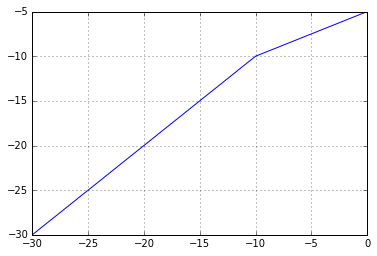

In [13]:
x = np.linspace(-30,0, 100)
y =gainCompute(x,-10.,2.)
plt.plot(x,y)
plt.grid()
plt.show()

# Peak detector

In [15]:
def peakDetector(x,tA,tR,sr):
    aA = np.exp(-1/(tA*sr))
    aR = np.exp(-1/(tR*sr))
    
    N = len(x)
    y1 = 0
    
    Y = np.zeros_like(x)
    
    for n in range(N):
        if x[n] >y1:
            y1 = aA*y1+(1-aA)*x[n]
            Y[n] = y1
        else:
            y1 = aR*y1+(1-aR)*x[n]
            Y[n] = y1
    return Y
            
    

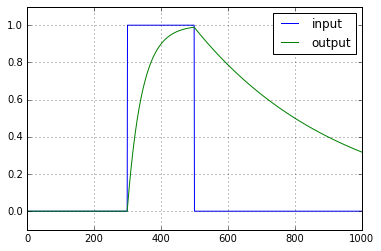

In [19]:
x = np.zeros(1000)
x[300:500] = 1

y = peakDetector(x,0.001, 0.01, 44100)
plt.plot(x, label='input')
plt.plot(y, label='output')
plt.grid()
plt.legend()
plt.ylim([-0.1, 1.1])
plt.show()

In [34]:
def compressor(x, attack, release, threshold, ratio, sr):
    toDb = np.abs(x)
    toGainComp = librosa.amplitude_to_db(toDb)
    gcOut = gainCompute(toGainComp, threshold, ratio)
    toPeakDetect =  gcOut - toGainComp 
    toLin = peakDetector(toPeakDetect,attack, release, sr)
    gain = librosa.db_to_amplitude(toLin)
    y = x*gain
    return y, gain

In [36]:
x, sr  =librosa.load('../../drumLoop.wav')

In [39]:
attack = 0.001
release = 0.03
threshold = -25
ratio = 10
y,gain = compressor(x, attack, release, threshold, ratio, sr)

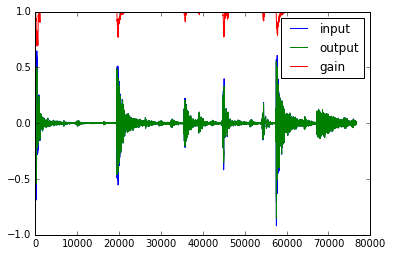

In [40]:
plt.plot(x, label='input')
plt.plot(y, label='output')
plt.plot(gain, label='gain')
plt.legend()
plt.show()
